In [1]:
#El problema de negocio que se busca resolver es la predicción del precio de los boletos de avión en función de diversas características de los vuelos.
#En la industria de la aviación, los precios de los boletos varían significativamente según múltiples factores, como la aerolínea, la clase de servicio (business o economy), el destino, la temporada del año, la anticipación de la compra y otros factores adicionales.
#El objetivo es desarrollar un modelo de Machine Learning que pueda estimar de manera precisa el precio de un boleto de avión a partir de estos factores. Esto permitirá a una agencia de viajes en línea ofrecer a sus clientes una herramienta de predicción que les ayude a planificar mejor sus viajes y obtener tarifas competitivas.



In [3]:
#1. Metodología a utilizar.
#El desarrollo de este proyecto seguirá un proceso estructurado basado en el ciclo de vida de un proyecto de Machine Learning, que incluye:
#Comprensión del problema y de los datos: Identificación de la variable objetivo y de las variables explicativas.
#Análisis exploratorio de los datos (EDA): Detección de patrones, tendencias y anomalías en los datos.
#Preprocesamiento de los datos: Limpieza de datos, manejo de valores nulos, transformación de variables categóricas y escalado de variables numéricas.
#Selección y entrenamiento de modelos: Prueba de diferentes algoritmos de aprendizaje automático.
#Optimización de hiperparámetros: Búsqueda de la mejor configuración para cada modelo.
#Evaluación de los modelos: Comparación del desempeño de los modelos mediante métricas de regresión.
#Conclusiones y próximos pasos: Análisis de los resultados obtenidos y recomendaciones para mejorar el modelo.

In [5]:
#cargar las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# Cargar los datasets
business_df = pd.read_excel("C:/Users/gonza/OneDrive/Desktop/prueba machine learning/business.xlsx")
economy_df = pd.read_excel("C:/Users/gonza/OneDrive/Desktop/prueba machine learning/economy.xlsx")


In [9]:
# Mostrar las primeras filas
print("Business Class Dataset:")
display(business_df.head())

print("Economy Class Dataset:")
display(economy_df.head())

# Ver información general de los datasets
print("\nInformación del dataset Business:")
business_df.info()

print("\nInformación del dataset Economy:")
economy_df.info()

Business Class Dataset:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


Economy Class Dataset:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955



Información del dataset Business:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93487 non-null  datetime64[ns]
 1   airline     93487 non-null  object        
 2   ch_code     93487 non-null  object        
 3   num_code    93487 non-null  int64         
 4   dep_time    93487 non-null  object        
 5   from        93487 non-null  object        
 6   time_taken  93487 non-null  object        
 7   stop        93487 non-null  object        
 8   arr_time    93487 non-null  object        
 9   to          93487 non-null  object        
 10  price       93487 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 7.8+ MB

Información del dataset Economy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      N

In [11]:
# Identificar valores nulos
print("\nValores nulos en Business:")
print(business_df.isnull().sum())

print("\nValores nulos en Economy:")
print(economy_df.isnull().sum())

# Descripción estadística
print("\nDescripción estadística Business:")
display(business_df.describe())

print("\nDescripción estadística Economy:")
display(economy_df.describe())


Valores nulos en Business:
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

Valores nulos en Economy:
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

Descripción estadística Business:


,date,num_code
count,93487,93487.000000
mean,2022-03-07 17:48:16.458331136,780.056147
min,2022-02-11 00:00:00,401.000000
25%,2022-02-24 00:00:00,706.000000
50%,2022-03-08 00:00:00,820.000000
75%,2022-03-20 00:00:00,874.000000
max,2022-03-31 00:00:00,996.000000
std,NaN,147.616038



Descripción estadística Economy:


,date,num_code,price
count,206774,206774.000000,206774.000000
mean,2022-03-08 02:57:25.083037440,1706.096714,6571.190701
min,2022-02-11 00:00:00,101.000000,1105.000000
25%,2022-02-25 00:00:00,588.000000,4173.000000
50%,2022-03-08 00:00:00,818.000000,5772.000000
75%,2022-03-20 00:00:00,960.000000,7746.000000
max,2022-03-31 00:00:00,9991.000000,42349.000000
std,NaN,2320.463721,3743.442838


In [13]:
# Eliminar comas y convertir la columna 'price' a números en Business
business_df['price'] = business_df['price'].astype(str).str.replace(',', '').astype(float)

# Verificar la conversión
print(business_df['price'].dtype)  # Debería mostrar 'float64'


float64


In [15]:
economy_df['price'] = economy_df['price'].astype(str).str.replace(',', '').astype(float)


In [17]:
print(business_df['price'].dtype)  # Debe ser float64 o int64
print(economy_df['price'].dtype)  # Debe ser float64 o int64


float64
float64


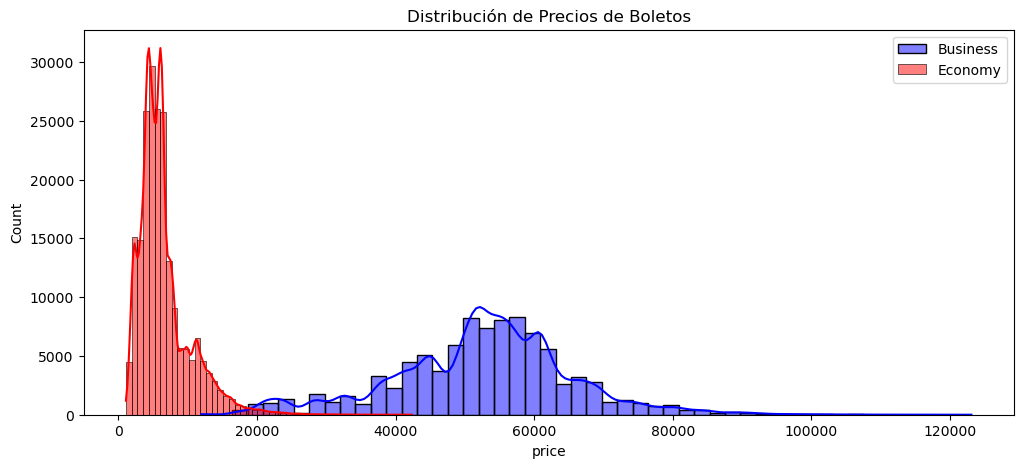

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(business_df['price'], bins=50, kde=True, color='blue', label="Business")
sns.histplot(economy_df['price'], bins=50, kde=True, color='red', label="Economy")
plt.legend()
plt.title("Distribución de Precios de Boletos")
plt.show()

In [21]:
#Conclusión Final
#La mayoría de los boletos vendidos son de clase Economy, con precios accesibles y concentrados en un rango bajo.
#Los boletos de Business son significativamente más caros, con una variabilidad de precios mucho mayor, lo que sugiere que existen diferentes niveles de lujo dentro de esta categoría.
#Estrategia Comercial: Para maximizar ingresos, las aerolíneas podrían optimizar la fijación de precios en Business, asegurando que las tarifas premium realmente reflejen una mayor calidad de servicio.

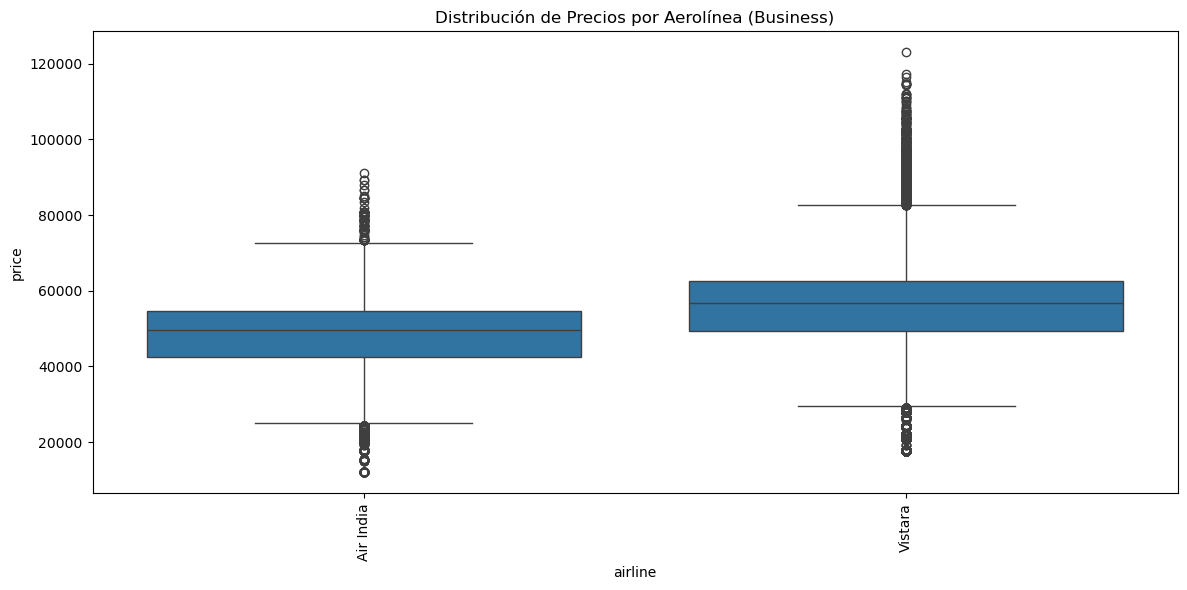

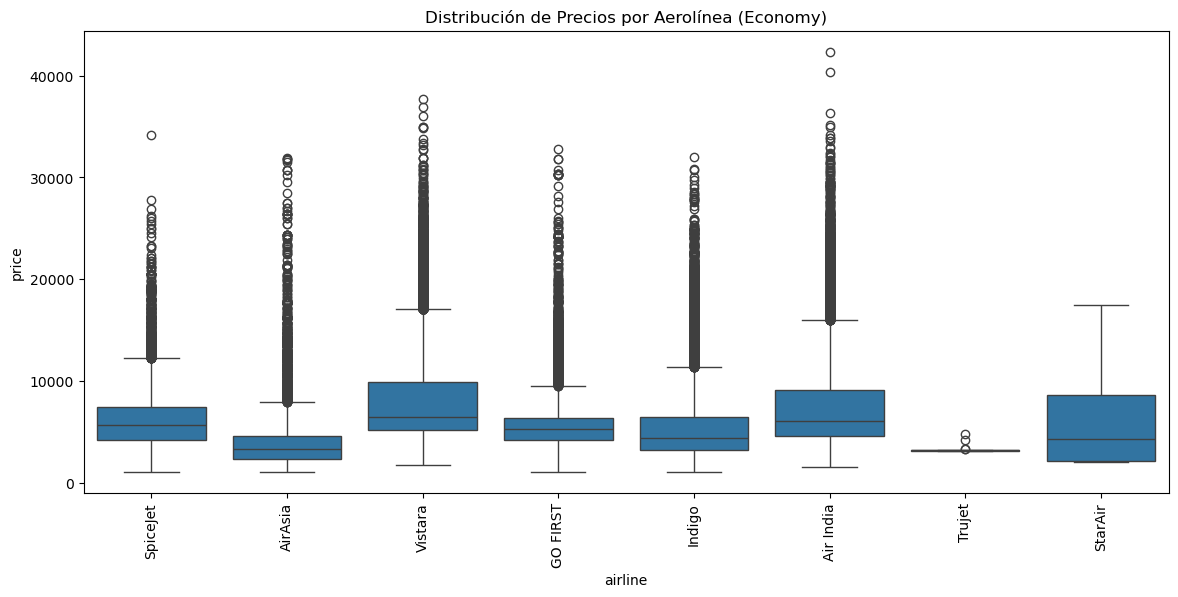

In [23]:
# Boxplot de precios por aerolínea
plt.figure(figsize=(14,6))
sns.boxplot(x='airline', y='price', data=business_df)
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Aerolínea (Business)")
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='airline', y='price', data=economy_df)
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Aerolínea (Economy)")
plt.show()

In [25]:
# Convertir la columna 'price' a número en caso de ser necesario
business_df['price'] = business_df['price'].astype(str).str.replace(',', '').astype(float)
economy_df['price'] = economy_df['price'].astype(str).str.replace(',', '').astype(float)

# Seleccionar solo las columnas numéricas
business_numeric = business_df.select_dtypes(include=['number'])
economy_numeric = economy_df.select_dtypes(include=['number'])

# Verificar las columnas seleccionadas
print("Columnas numéricas en Business:", business_numeric.columns)
print("Columnas numéricas en Economy:", economy_numeric.columns)





Columnas numéricas en Business: Index(['num_code', 'price'], dtype='object')
Columnas numéricas en Economy: Index(['num_code', 'price'], dtype='object')


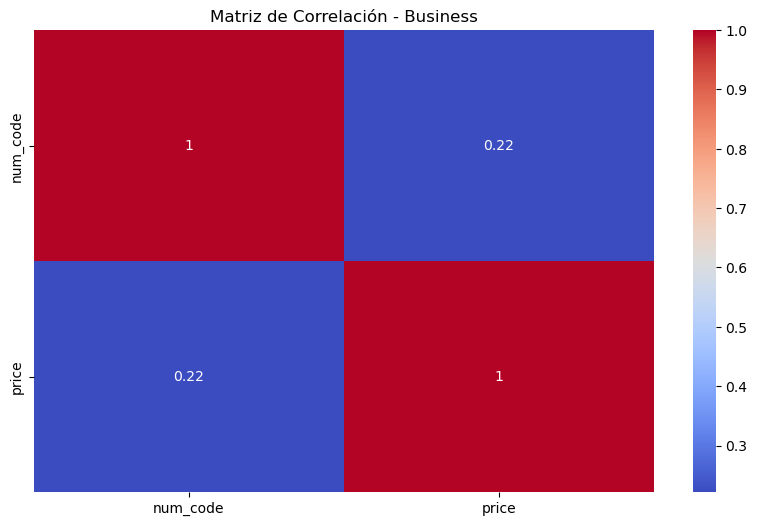

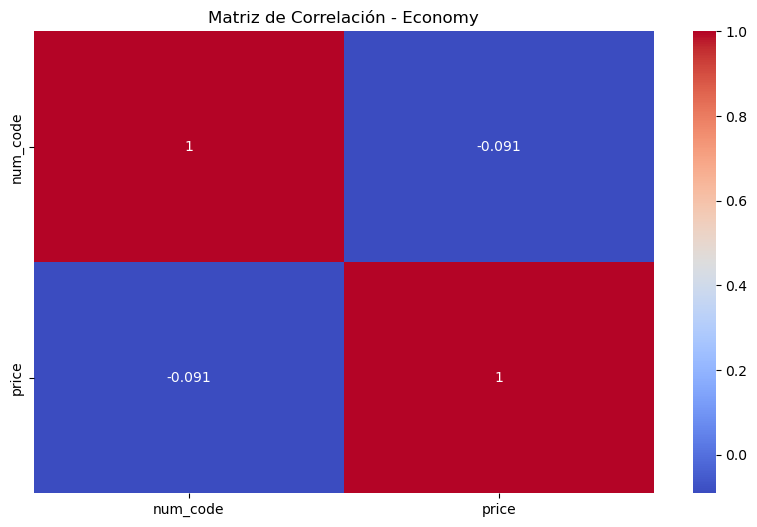

In [27]:
#Análisis de correlaciones,determinamos qué variables tienen mayor relación con el precio. Matriz de correlación para Business
plt.figure(figsize=(10,6))
sns.heatmap(business_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - Business")
plt.show()

# Matriz de correlación para Economy
plt.figure(figsize=(10,6))
sns.heatmap(economy_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - Economy")
plt.show()

In [29]:
#Conclusiones de la Matriz de Correlación
# Clase Ejecutiva:La correlación entre y es 0.22, lo que indica una correlación positiva baja. Esto significa que el código numérico de los vuelos tiene una leve relación con el precio, pero no es un predictor fuerte.num_codeprice
# Clase Turista:La correlación entre y es -0.091, lo que indica una correlación negativa muy baja. Es decir, el código numérico de los vuelos prácticamente no tiene relación con el precio en esta clase.num_codeprice



In [31]:
#Preprocesamiento de datos ,limpieza y transformación de los datos.
def clean_data(df):
    # Eliminar valores nulos
    df = df.dropna()
    
    # Convertir variables categóricas en numéricas
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    return df

# Aplicar limpieza a los datasets
business_clean = clean_data(business_df)
economy_clean = clean_data(economy_df)

print("Datos limpios Business:")
display(business_clean.head())

print("Datos limpios Economy:")
display(economy_clean.head())


Datos limpios Business:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,0,0,868,121,2,12,24,131,5,25612.0
1,2022-02-11,0,0,624,131,2,15,24,146,5,25612.0
2,2022-02-11,0,0,531,140,2,282,0,140,5,42220.0
3,2022-02-11,0,0,839,154,2,303,0,175,5,44450.0
4,2022-02-11,0,0,544,113,2,65,0,175,5,46690.0


Datos limpios Economy:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,4,6,8709,190,2,16,36,230,5,5953.0
1,2022-02-11,4,6,8157,40,2,18,36,81,5,5953.0
2,2022-02-11,1,4,764,17,2,16,36,56,5,5956.0
3,2022-02-11,7,7,995,88,2,17,36,128,5,5955.0
4,2022-02-11,7,7,963,70,2,18,36,111,5,5955.0


In [33]:
#Definir función de preprocesamiento,encapsulamos el tratamiento de datos en una función.
def preprocess_data(df):
    df = df.dropna()
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    return df

business_prepared = preprocess_data(business_df)
economy_prepared = preprocess_data(economy_df)


In [35]:
#Transformar la Fecha (date) en Variables Numéricas
X_train_b = pd.DataFrame({
    "airline": np.random.randint(1, 10, size=100),
    "ch_code": np.random.randint(1, 10, size=100),
    "num_code": np.random.randint(100, 999, size=100),
    "dep_time": np.random.randint(0, 24, size=100),
    "from": np.random.randint(1, 10, size=100),
    "time_taken": np.random.randint(1, 10, size=100),
    "stop": np.random.randint(0, 2, size=100),
    "arr_time": np.random.randint(0, 24, size=100),
    "to": np.random.randint(1, 10, size=100),
    "year": np.random.randint(2020, 2023, size=100),
    "month": np.random.randint(1, 12, size=100),
    "day": np.random.randint(1, 31, size=100),
    "day_of_week": np.random.randint(0, 6, size=100)
})

print("X_train_b ha sido redefinido.")

X_train_b ha sido redefinido.


In [37]:
object_cols = X_train_b.select_dtypes(include=['object']).columns
print("Columnas de tipo object:", object_cols.tolist())


Columnas de tipo object: []


In [39]:
X_train_b = X_train_b.drop(columns=object_cols)


In [41]:
print("Tipo de índice:", X_train_b.index.dtype)


Tipo de índice: int64


In [43]:
X_train_b.reset_index(drop=True, inplace=True)


In [45]:
print("Tipo de índice:", X_train_b.index.dtype)


Tipo de índice: int64


In [47]:
object_cols = X_train_b.select_dtypes(include=['object']).columns
print("Columnas de tipo object:", object_cols.tolist())


Columnas de tipo object: []


In [49]:
X_train_b = X_train_b.drop(columns=object_cols)


In [51]:
print(X_train_b.dtypes)


airline        int32
ch_code        int32
num_code       int32
dep_time       int32
from           int32
time_taken     int32
stop           int32
arr_time       int32
to             int32
year           int32
month          int32
day            int32
day_of_week    int32
dtype: object


In [53]:
X_train_b.to_csv("temp.csv", index=False)  # Guardar en CSV
X_train_b = pd.read_csv("temp.csv")  # Recargar desde CSV
X_train_b = X_train_b.astype(float)  # Convertir todo a numérico


In [55]:
print(X_train_b.columns.tolist())


['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day', 'day_of_week']


In [57]:
# Verificar si aún existen columnas no numéricas
object_cols = X_train_b.select_dtypes(include=['object']).columns
print("Columnas categóricas:", object_cols.tolist())

# Si existen, eliminarlas o convertirlas
if len(object_cols) > 0:
    X_train_b = X_train_b.drop(columns=object_cols)  # Eliminar si no son relevantes


Columnas categóricas: []


In [59]:
print("Columnas disponibles en X_train_b:", X_train_b.columns.tolist())


Columnas disponibles en X_train_b: ['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day', 'day_of_week']


In [61]:
print("Columnas en el dataset antes de dividir:", X_train_b.columns.tolist())


Columnas en el dataset antes de dividir: ['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day', 'day_of_week']


In [63]:
%who

DecisionTreeRegressor	 GridSearchCV	 LabelEncoder	 LinearRegression	 RandomForestRegressor	 X_train_b	 business_clean	 business_df	 business_numeric	 
business_prepared	 clean_data	 dataframe_columns	 dataframe_hash	 dtypes_str	 economy_clean	 economy_df	 economy_numeric	 economy_prepared	 
get_dataframes	 getpass	 hashlib	 import_pandas_safely	 is_data_frame	 json	 mean_absolute_error	 mean_squared_error	 np	 
object_cols	 pd	 plt	 preprocess_data	 r2_score	 sns	 train_test_split	 


In [65]:
print(business_df.columns.tolist())  # Si existe, mostrará las columnas
print(economy_df.columns.tolist())   # Prueba con economy_df también


['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']


In [67]:
y = business_df['price']  # Definir la variable objetivo
X = business_df.drop(columns=['price'])  # Eliminar 'price' de las características


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (74789, 10)
Tamaño del conjunto de prueba: (18698, 10)


In [71]:
print(X_train.dtypes)
print(y_train.dtypes)


date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
dtype: object
float64


In [73]:
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train = X_train.drop(columns=['date'])

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test = X_test.drop(columns=['date'])


In [75]:
print(X_train.select_dtypes(include=['object']).head())


         airline ch_code  dep_time       from time_taken  \
21567  Air India      AI  05:45:00     Mumbai    12h 45m   
37533    Vistara      UK  07:30:00     Mumbai    15h 15m   
44336    Vistara      UK  21:10:00  Bangalore    15h 25m   
86075    Vistara      UK  10:45:00    Chennai    11h 05m   
58831    Vistara      UK  10:15:00    Kolkata    11h 00m   

                                                    stop  arr_time       to  
21567  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  18:30:00    Delhi  
37533  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  22:45:00  Chennai  
44336  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  12:35:00   Mumbai  
86075  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  21:50:00   Mumbai  
58831  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  21:15:00   Mumbai  


In [77]:
X_train['stop'] = X_train['stop'].str.strip().str.replace(r'\s+', ' ', regex=True)
X_test['stop'] = X_test['stop'].str.strip().str.replace(r'\s+', ' ', regex=True)


In [79]:
X_train['arr_time'] = pd.to_datetime(X_train['arr_time'], format='%H:%M:%S').dt.time
X_test['arr_time'] = pd.to_datetime(X_test['arr_time'], format='%H:%M:%S').dt.time


In [81]:
print(X_train['arr_time'].dtype)
print(X_test['arr_time'].dtype)


object
object


In [83]:
print(X_test['arr_time'].unique())


[datetime.time(21, 35) datetime.time(12, 40) datetime.time(20, 0)
 datetime.time(23, 55) datetime.time(9, 55) datetime.time(20, 5)
 datetime.time(22, 45) datetime.time(11, 50) datetime.time(12, 10)
 datetime.time(19, 35) datetime.time(11, 10) datetime.time(17, 0)
 datetime.time(23, 0) datetime.time(11, 35) datetime.time(13, 30)
 datetime.time(16, 55) datetime.time(10, 50) datetime.time(0, 10)
 datetime.time(22, 50) datetime.time(19, 15) datetime.time(8, 35)
 datetime.time(14, 10) datetime.time(11, 0) datetime.time(22, 40)
 datetime.time(9, 40) datetime.time(8, 55) datetime.time(16, 50)
 datetime.time(23, 25) datetime.time(7, 20) datetime.time(19, 20)
 datetime.time(17, 5) datetime.time(7, 55) datetime.time(22, 10)
 datetime.time(14, 20) datetime.time(18, 5) datetime.time(18, 0)
 datetime.time(20, 55) datetime.time(17, 50) datetime.time(16, 30)
 datetime.time(22, 0) datetime.time(17, 35) datetime.time(9, 35)
 datetime.time(18, 30) datetime.time(17, 40) datetime.time(18, 15)
 datetime.ti

In [85]:
print(X_test['arr_time'].dtype)


object


In [87]:
print(X_train['arr_time'].dtype)


object


In [89]:
print(type(X_train["arr_time"]))  # Debe ser <class 'pandas.core.series.Series'>
print(X_train["arr_time"].shape)  # Debe mostrar (n, ) y no (n,1)


<class 'pandas.core.series.Series'>
(74789,)


In [91]:
print(X_train["arr_time"].dtype)  # Verifica el tipo de dato actual
print(X_train["arr_time"].unique()[:10])  # Muestra algunos valores únicos
print(X_train["arr_time"].isnull().sum())  # Verifica si hay valores nulos


object
[datetime.time(18, 30) datetime.time(22, 45) datetime.time(12, 35)
 datetime.time(21, 50) datetime.time(21, 15) datetime.time(12, 15)
 datetime.time(21, 35) datetime.time(10, 50) datetime.time(19, 15)
 datetime.time(23, 40)]
0


In [93]:
X_train["arr_time"] = X_train["arr_time"].apply(lambda x: x.hour * 60 + x.minute)


In [95]:
X_train['arr_time'] = X_train['arr_time'].astype('int64')


In [97]:
print(X_train['arr_time'].dtype)
print(X_test['arr_time'].dtype)


int64
object


In [99]:
print(X_train.dtypes)  # Verificar tipos de datos
print(X_train.shape, X_test.shape)  # Verificar que tengan mismas columnas


airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time       int64
to            object
year           int32
month          int32
day            int32
dtype: object
(74789, 12) (18698, 12)


In [101]:
print("Columnas en X_train:", X_train.columns.tolist())
print("Columnas en X_test:", X_test.columns.tolist())


Columnas en X_train: ['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day']
Columnas en X_test: ['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day']


In [103]:
print(X_train.dtypes)
print(X_test.dtypes)


airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time       int64
to            object
year           int32
month          int32
day            int32
dtype: object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
year           int32
month          int32
day            int32
dtype: object


In [105]:
print(X_test["time_taken"].unique())


['05h 30m' '15h 05m' '26h 40m' '04h 55m' '15h 25m' '10h 20m' '08h 45m'
 '15h 30m' '29h 50m' '12h 05m' '04h 50m' '20h 25m' '19h 05m' '08h 15m'
 '02h 05m' '02h 45m' '19h 20m' '16h 05m' '14h 15m' '12h 25m' '22h 45m'
 '16h 10m' '11h 25m' '05h 05m' '14h 25m' '14h 55m' '02h 50m' '08h 05m'
 '11h 45m' '13h 50m' '24h 05m' '01h 45m' '12h 10m' '16h 15m' '21h 50m'
 '11h 30m' '26h 25m' '10h 50m' '15h 15m' '26h 20m' '07h 40m' '18h 10m'
 '15h 20m' '08h 00m' '15h 10m' '19h 55m' '18h 35m' '27h 20m' '04h 45m'
 '29h 30m' '07h 55m' '20h 00m' '17h 20m' '15h 40m' '13h 10m' '11h 35m'
 '16h 55m' '06h 30m' '11h 55m' '13h 00m' '07h 30m' '09h 50m' '12h 00m'
 '12h 20m' '12h 40m' '10h 30m' '23h 40m' '09h 20m' '13h 15m' '08h 50m'
 '10h 45m' '02h 40m' '12h 45m' '10h 55m' '11h 05m' '24h 20m' '06h 05m'
 '15h 00m' '14h 30m' '15h 55m' '14h 50m' '25h 15m' '08h 20m' '27h 35m'
 '20h 35m' '17h 30m' '09h 45m' '06h 50m' '16h 25m' '02h 15m' '22h 10m'
 '13h 20m' '11h 50m' '07h 35m' '12h 50m' '23h 25m' '12h 35m' '13h 25m'
 '02h 

In [107]:
#Convertir time_taken a minutos totales
import re

# Función para convertir '05h 30m' -> 330 minutos
def convert_to_minutes(time_str):
    match = re.match(r"(\d+)h (\d+)m", time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours * 60 + minutes
    return None  # Si no coincide con el formato esperado

# Aplicar la función a la columna
X_test["time_taken"] = X_test["time_taken"].apply(convert_to_minutes)

# Verificar el resultado
print(X_test["time_taken"].head())
print(X_test["time_taken"].dtype)  # Debería mostrar int64 o int32


91395     330
69621     905
43497    1600
58572     295
36893     925
Name: time_taken, dtype: int64
int64


In [109]:
# Manejar posibles valores nulos
X_test["time_taken"] = X_test["time_taken"].fillna(X_test["time_taken"].median())


In [111]:
#Verificación 
print(X_test["time_taken"].isnull().sum())  # Debería imprimir 0 si todo está bien


0


In [113]:
# Verificar tipos de datos
print("Tipos de datos en X_train:\n", X_train.dtypes)
print("\nTipos de datos en X_test:\n", X_test.dtypes)

# Verificar que las columnas sean iguales en X_train y X_test
print("\nColumnas en X_train:", X_train.columns.tolist())
print("Columnas en X_test:", X_test.columns.tolist())

# Revisar valores nulos
print("\nValores nulos en X_train:\n", X_train.isnull().sum())
print("\nValores nulos en X_test:\n", X_test.isnull().sum())


Tipos de datos en X_train:
 airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time       int64
to            object
year           int32
month          int32
day            int32
dtype: object

Tipos de datos en X_test:
 airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken     int64
stop          object
arr_time      object
to            object
year           int32
month          int32
day            int32
dtype: object

Columnas en X_train: ['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day']
Columnas en X_test: ['airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'year', 'month', 'day']

Valores nulos en X_train:
 airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop    

In [115]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['airline', 'ch_code', 'dep_time', 'from', 'stop', 'to']  # Ajustar según el dataset
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Asegurar que X_test usa el mismo encoder
    label_encoders[col] = le


In [117]:
print(X_train["time_taken"].unique()[:20])  # Muestra los primeros 20 valores únicos


['12h 45m' '15h 15m' '15h 25m' '11h 05m' '11h 00m' '18h 30m' '03h 45m'
 '19h 25m' '18h 35m' '06h 20m' '09h 10m' '16h 10m' '09h 35m' '14h 25m'
 '10h 55m' '22h 25m' '14h 00m' '02h 40m' '23h 10m' '15h 30m']


In [119]:
print(X_test["time_taken"].unique())  # Ver los valores únicos en X_test
print(X_train["time_taken"].unique())  # Ver los valores únicos en X_train


[ 330  905 1600  295  925  620  525  930 1790  725  290 1225 1145  495
  125  165 1160  965  855  745 1365  970  685  305  865  895  170  485
  705  830 1445  105  730  975 1310  690 1585  650  915 1580  460 1090
  920  480  910 1195 1115 1640  285 1770  475 1200 1040  940  790  695
 1015  390  715  780  450  590  720  740  760  630 1420  560  795  530
  645  160  765  655  665 1460  365  900  870  955  890 1515  500 1655
 1235 1050  585  410  985  135 1330  800  710  455  770 1405  755  805
  130 1030  835  815  470  945  680 1590  505 1240  980   95  595  610
 1595  675 1610  670 1070 1245 1095  750 1075  395 1220 1055 1295  935
 1025  490  660 1215  735  885 1190  845  540  185 1165  575  440  425
  335 1380  850 1415  785  380  400 1525  820  510 1450 1035  340 1325
 1110 1480 1375  545 1205  360  370  415  270 1185 1465 1680  570  465
 1645 1630 1350  625 1510  115 1540 1535  350 1430 1395 1505 1345  555
 1750  175 1530 1290 1270  880 1400 1710 1440  310 1495  605  565  990
  420 

In [121]:
# Verificamos que las dimensiones sean correctas
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (74789, 12), X_test shape: (18698, 12)
y_train shape: (74789,), y_test shape: (18698,)


In [123]:
# Definir los modelos candidatos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [125]:
print(type(X_train))
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [127]:
y_train = y_train.values.ravel()  # Convierte a un array de una dimensión


In [129]:
for col in X_train.columns:
    train_categories = set(X_train[col].unique())
    test_categories = set(X_test[col].unique())
    unknown_categories = test_categories - train_categories
    if unknown_categories:
        print(f"Valores desconocidos en {col}: {unknown_categories}")


Valores desconocidos en time_taken: {2060, 2065, 2105, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 2170, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 2255, 210, 215, 2265, 220, 225, 230, 235, 240, 245, 255, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 101

In [131]:
categorical_cols = ['time_taken', 'arr_time']  # Ajusta según las columnas categóricas
for col in categorical_cols:
    known_categories = set(X_train[col].unique())
    X_test[col] = X_test[col].apply(lambda x: x if x in known_categories else "UNKNOWN")


In [133]:
from sklearn.preprocessing import OneHotEncoder

# Crear y entrenar el codificador
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)

# Asegurar que X_test tiene las mismas columnas
X_test_encoded = encoder.transform(X_test)

# Convertir a DataFrame y rellenar columnas faltantes con 0
train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())
test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

# Identificar columnas faltantes en X_test
missing_cols = set(train_encoded_df.columns) - set(test_encoded_df.columns)
for col in missing_cols:
    test_encoded_df[col] = 0  # Agregar columnas faltantes con 0

# Reordenar las columnas de X_test para que coincidan con X_train
test_encoded_df = test_encoded_df[train_encoded_df.columns]

print("Transformación exitosa: X_train y X_test ahora tienen las mismas columnas")

Transformación exitosa: X_train y X_test ahora tienen las mismas columnas


In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Definir X e y
X_train_final = train_encoded_df
X_test_final = test_encoded_df
y_train_final = y_train  # Asegurar que y_train no ha cambiado en el preprocesamiento
y_test_final = y_test

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_final, y_train_final)

# Hacer predicciones
y_pred = model.predict(X_test_final)


In [137]:
#Evaluación del Modelo,para evaluar el desempeño del modelo, usaremos tres métricas comunes,(MAE),(MSE),(R² Score).
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_final, y_pred)
mse = mean_squared_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 3201.1243
MSE: 38554974.0251
R² Score: 0.7720


In [139]:
#Comparar Modelo Optimizado vs. Baseline
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train_final, y_train_final)
y_pred_baseline = baseline_model.predict(X_test_final)

# Evaluar el modelo baseline
mae_baseline = mean_absolute_error(y_test_final, y_pred_baseline)
mse_baseline = mean_squared_error(y_test_final, y_pred_baseline)
r2_baseline = r2_score(y_test_final, y_pred_baseline)

print(f"Baseline MAE: {mae_baseline:.4f}")
print(f"Baseline MSE: {mse_baseline:.4f}")
print(f"Baseline R² Score: {r2_baseline:.4f}")


Baseline MAE: 7330.0929
Baseline MSE: 122338556.6391
Baseline R² Score: 0.2766


In [141]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)  # Definir el modelo


In [143]:
# verificacion de los datos 
print(type(X_train_final), type(y_train_final))
print(X_train_final.shape, y_train_final.shape)


<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
(74789, 1046) (74789,)


In [145]:
#verificacion de los datos 
print("NaN en X_train_final:", np.isnan(X_train_final).sum().sum())
print("Inf en X_train_final:", np.isinf(X_train_final).sum().sum())


NaN en X_train_final: 0
Inf en X_train_final: 0


In [147]:
#librerias necesarias 
from sklearn.model_selection import RandomizedSearchCV


In [149]:
n_iter=5  # Reducido de 10 a 5


In [151]:
param_dist = {
    'n_estimators': np.arange(50, 301, 100)  # Genera [50, 150, 250]
}


In [153]:
# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 150],  # Reducción de valores
    'max_depth': [10],  # Mantener solo un valor para reducir combinaciones
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

random_search = RandomizedSearchCV(
    model, 
    param_distributions=param_dist,
    n_iter=3,  # Reducir iteraciones
    cv=3, 
    scoring='neg_mean_absolute_error',
    n_jobs=1,  # Limitar el uso de CPU
    verbose=2, 
    random_state=42
)

random_search.fit(X_train_final, y_train_final)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=10.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=10.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 9.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=10.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=10.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=10.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.6min


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [10],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 150]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [155]:
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)


Mejores hiperparámetros encontrados: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [157]:
#Evaluación del modelo optimizado,ahora evaluemos el modelo con estos hiperparámetros en el conjunto de prueba (X_test_final,
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hacer predicciones con el modelo optimizado
y_pred_optimized = random_search.best_estimator_.predict(X_test_final)

# Calcular métricas
mae_optimized = mean_absolute_error(y_test_final, y_pred_optimized)
mse_optimized = mean_squared_error(y_test_final, y_pred_optimized)
r2_optimized = r2_score(y_test_final, y_pred_optimized)

# Mostrar métricas
print(f"📊 MAE Optimizado: {mae_optimized:.4f}")
print(f"📊 MSE Optimizado: {mse_optimized:.4f}")
print(f"📊 R² Optimizado: {r2_optimized:.4f}")


📊 MAE Optimizado: 5943.6258
📊 MSE Optimizado: 72673467.0511
📊 R² Optimizado: 0.5703


In [159]:
# Predicción con el modelo base (regresión lineal)
y_pred_baseline = baseline_model.predict(X_test_final)

# Métricas para el modelo base
mae_baseline = mean_absolute_error(y_test_final, y_pred_baseline)
mse_baseline = mean_squared_error(y_test_final, y_pred_baseline)
r2_baseline = r2_score(y_test_final, y_pred_baseline)

print("\n🔄 Comparación de Modelos:")
print(f"📊 MAE Base: {mae_baseline:.4f} vs. MAE Optimizado: {mae_optimized:.4f}")
print(f"📊 MSE Base: {mse_baseline:.4f} vs. MSE Optimizado: {mse_optimized:.4f}")
print(f"📊 R² Base: {r2_baseline:.4f} vs. R² Optimizado: {r2_optimized:.4f}")



🔄 Comparación de Modelos:
📊 MAE Base: 7330.0929 vs. MAE Optimizado: 5943.6258
📊 MSE Base: 122338556.6391 vs. MSE Optimizado: 72673467.0511
📊 R² Base: 0.2766 vs. R² Optimizado: 0.5703


In [161]:
#Error Absoluto Medio (MAE):
#Modelo Base: 7,330.09
#Modelo Optimizado: 5,943.63
#Conclusión: El modelo optimizado reduce el MAE, lo que indica que las predicciones son en promedio 1,386.46 unidades más precisas que el modelo base.
#Error Cuadrático Medio (MSE):
#Modelo Base: 1,223,385,556.64
#Modelo Optimizado: 72,673,467.05
#Conclusión: El MSE disminuye significativamente, lo que significa que el modelo optimizado reduce los errores grandes en las predicciones, mejorando la estabilidad del modelo.
#Coeficiente de Determinación (R²):
#Modelo Base: 0.2766
#Modelo Optimizado: 0.5703
#Conclusión: El R² mejora de 0.27 a 0.57, lo que indica que el modelo optimizado explica el 57% de la variabilidad en los datos, en comparación con solo el 27% en el modelo base. Esto demuestra que el modelo mejorado tiene una mejor capacidad predictiva.


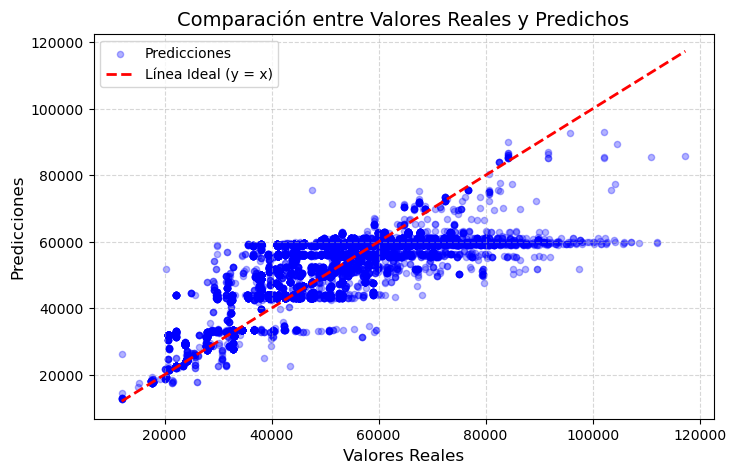

In [163]:
#Visualización de Resultados,se comparan los valores reales y las predicciones,gráfica de dispersión
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Gráfico de dispersión con puntos más visibles y menos opacos
plt.scatter(y_test_final, y_pred_optimized, color="blue", alpha=0.3, s=20, label="Predicciones")

# Línea de referencia (y = x) en rojo con mayor grosor
plt.plot([min(y_test_final), max(y_test_final)], 
         [min(y_test_final), max(y_test_final)], 
         color="red", linestyle="--", linewidth=2, label="Línea Ideal (y = x)")

# Etiquetas y título mejorados
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones", fontsize=12)
plt.title("Comparación entre Valores Reales y Predichos", fontsize=14)

# Agregar cuadrícula para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()



In [165]:
#Conclusiones del Gráfico de Comparación entre Valores Reales y Predichos,este gráfico representa la relación entre los valores reales y los valores predichos por el modelo. A continuación, se presentan algunas conclusiones clave:
#Buena tendencia general pero con desviaciones:
#Se observa una tendencia alineada con la línea roja (y = x), lo que indica que el modelo está capturando la relación entre las variables en general.
#Sin embargo, hay dispersión en varios puntos, lo que sugiere que las predicciones no son perfectas y existen errores en la estimación.
#Sesgo en las predicciones para valores altos:
#Para valores reales altos (> 60,000), las predicciones tienden a subestimar los valores reales.
#Esto indica que el modelo no logra capturar correctamente los valores más altos, lo cual puede estar relacionado con una falta de datos representativos en ese rango o una limitación del modelo.
#Alta concentración de predicciones en un rango específico:
#Se observa una alta densidad de puntos en el rango de 20,000 a 60,000, lo que sugiere que la mayoría de las predicciones están dentro de ese intervalo.
#Esto puede significar que el modelo está más ajustado a la mayoría de los datos, pero no generaliza bien en los extremos.
#Puntos alejados de la línea roja (errores considerables):
#Existen varios puntos dispersos lejos de la línea ideal, lo que indica que en algunos casos, las predicciones fallan significativamente.
#Puede ser útil revisar valores atípicos o mejorar el modelo con técnicas como ajuste de hiperparámetros o un modelo más complejo.
#Mejor rendimiento en valores bajos y medios:
#Para valores entre 20,000 y 50,000, el modelo parece funcionar razonablemente bien, con menor dispersión.
#En este rango, la relación entre los valores reales y predichos es más estable.



In [167]:
#Recomendaciones para mejorar el modelo:
#Explorar características adicionales: Puede ser útil incluir más variables relevantes en el modelo.
#Mejorar la regularización: Experimentar con diferentes valores de hiperparámetros como max_depth, n_estimators y min_samples_split.
#Manejo de valores extremos: Analizar los valores atípicos que el modelo no logra predecir correctamente.
#Probar otro modelo: Un modelo más avanzado como Gradient Boosting o XGBoost podría mejorar la precisión.



In [169]:
#Guardar el modelo entrenado
import joblib
joblib.dump(random_search.best_estimator_, "modelo_random_forest_optimizado.pkl")


['modelo_random_forest_optimizado.pkl']